# 1. Tải bộ dữ liệu

In [3]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 52.8MB/s]


# 2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 3. Đọc dữ liệu

In [4]:
dataset_path = '/content/titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')

In [23]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


# 4. Chia biến X, y

In [5]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

# 5. Thêm bias vào X

In [6]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

# 6. Chia tập train, val, test

In [9]:
val_size = 0.2
test_size = 0.125
random_state = 42
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y,
                                                  test_size=0.2,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                  test_size=0.125,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

# 7. Chuẩn hóa dữ liệu

In [11]:
nomalizer = StandardScaler()
X_train[:, 1:] = nomalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = nomalizer.transform(X_val[:, 1:])
X_test[:, 1:] = nomalizer.transform(X_test[:, 1:])

# 8. Cài đặt các hàm quan trọng

In [16]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(np.dot(X, theta))
  return y_hat

def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y_hat, y):
  return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()
  return acc

# 9. Khai báo các siêu tham số và khởi tạo weights

In [17]:
lr = 0.01
epochs = 100
batch_size = 16
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

# 10. Huấn luyện mô hình

In [21]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_hat, y_i)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_accs.append(train_batch_acc)
    train_losses.append(train_batch_loss)
    val_accs.append(val_batch_acc)
    val_losses.append(val_batch_loss)

    print (f'EPOCH{epoch + 1}: Training loss : {train_batch_loss:.3f} Validation loss : {val_batch_loss:.3f}')


EPOCH1: Training loss : 0.449 Validation loss : 0.419
EPOCH2: Training loss : 0.449 Validation loss : 0.419
EPOCH3: Training loss : 0.449 Validation loss : 0.419
EPOCH4: Training loss : 0.449 Validation loss : 0.419
EPOCH5: Training loss : 0.449 Validation loss : 0.419
EPOCH6: Training loss : 0.449 Validation loss : 0.418
EPOCH7: Training loss : 0.449 Validation loss : 0.418
EPOCH8: Training loss : 0.449 Validation loss : 0.418
EPOCH9: Training loss : 0.449 Validation loss : 0.418
EPOCH10: Training loss : 0.449 Validation loss : 0.418
EPOCH11: Training loss : 0.449 Validation loss : 0.418
EPOCH12: Training loss : 0.449 Validation loss : 0.418
EPOCH13: Training loss : 0.449 Validation loss : 0.418
EPOCH14: Training loss : 0.449 Validation loss : 0.418
EPOCH15: Training loss : 0.449 Validation loss : 0.417
EPOCH16: Training loss : 0.449 Validation loss : 0.417
EPOCH17: Training loss : 0.449 Validation loss : 0.417
EPOCH18: Training loss : 0.449 Validation loss : 0.417
EPOCH19: Training l

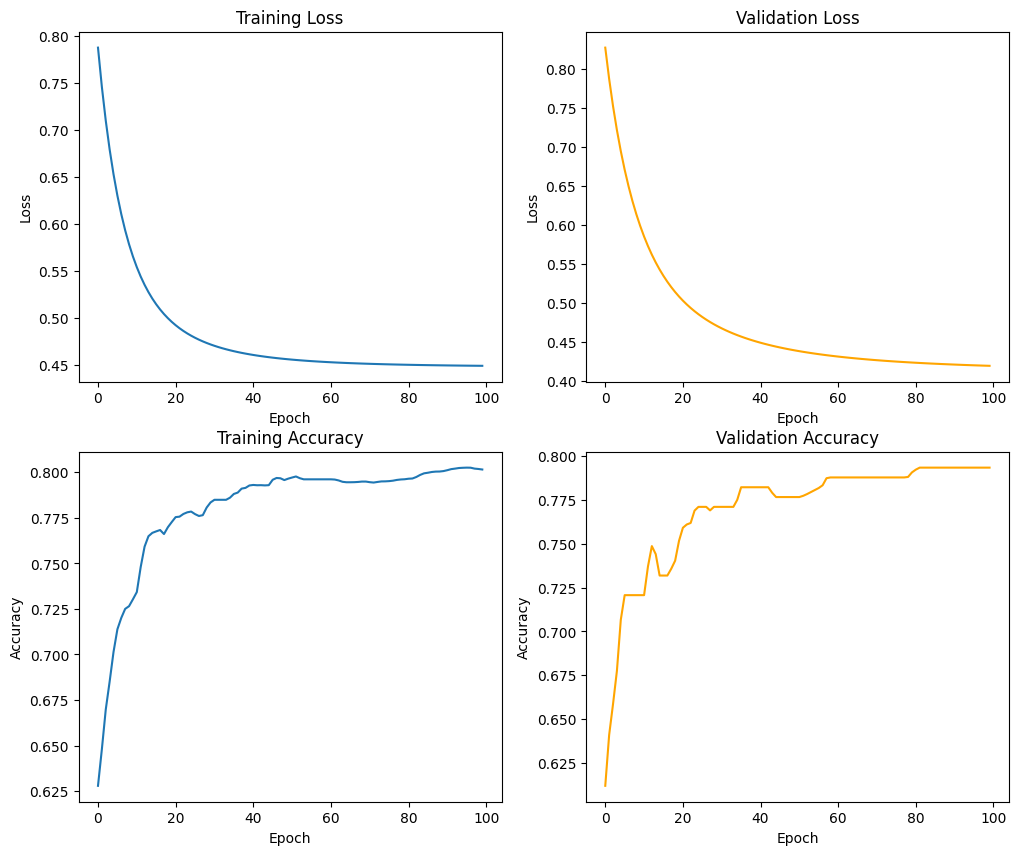

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

# 11. Đánh giá mô hình

In [22]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.7932960893854749
Accuracy: 0.8426966292134831
